<a href="https://colab.research.google.com/github/itsJeromeJ/Prodigy_ds_03/blob/main/Prodigy_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as plx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
from zipfile import ZipFile
dataset ='/content/bank.zip'
with ZipFile (dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [11]:
data_1=pd.read_csv("bank-full.csv",sep=';')

In [12]:
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
data_2=pd.read_csv("/content/bank.csv",sep=";")

In [14]:
data_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
data = pd.concat([data_1, data_2], ignore_index=True)
print(data)

       age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married    unknown      no     1506     yes   no   
4       33        unknown   single    unknown      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day month  duration  campaign  pda

In [17]:
count_values = {}
for col in data.columns:
    count_values[col] = len(data[col].unique())

for col, count in count_values.items():
    print(col, count)

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [18]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


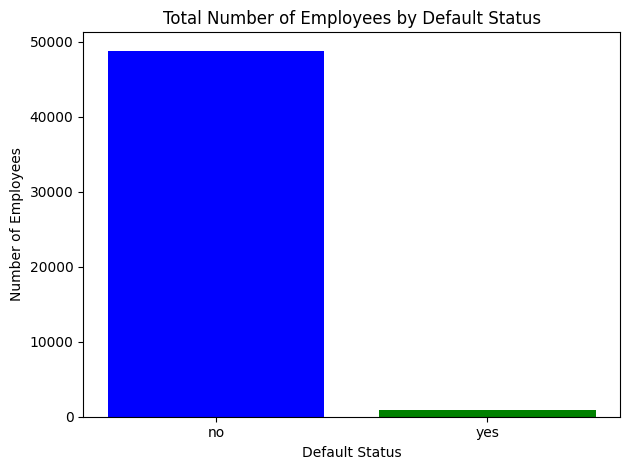

In [21]:
grouped = data.groupby('default').size().reset_index(name='num_employees')
plt.bar(grouped['default'], grouped['num_employees'], color=['blue', 'green'])
plt.xlabel('Default Status')
plt.ylabel('Number of Employees')
plt.title('Total Number of Employees by Default Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

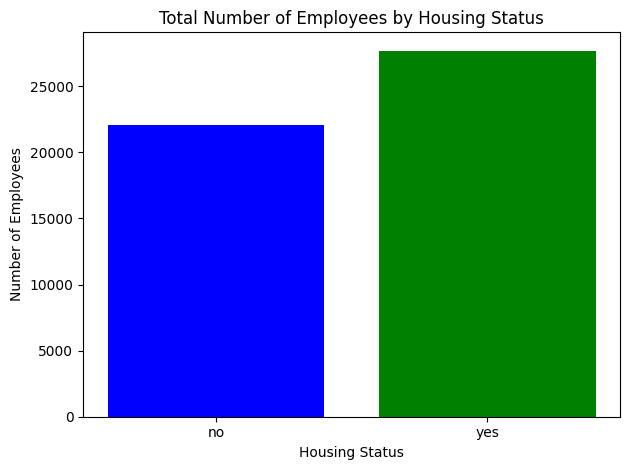

In [22]:
grouped = data.groupby('housing').size().reset_index(name='num_employees')
plt.bar(grouped['housing'], grouped['num_employees'], color=['blue', 'green'])
plt.xlabel('Housing Status')
plt.ylabel('Number of Employees')
plt.title('Total Number of Employees by Housing Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

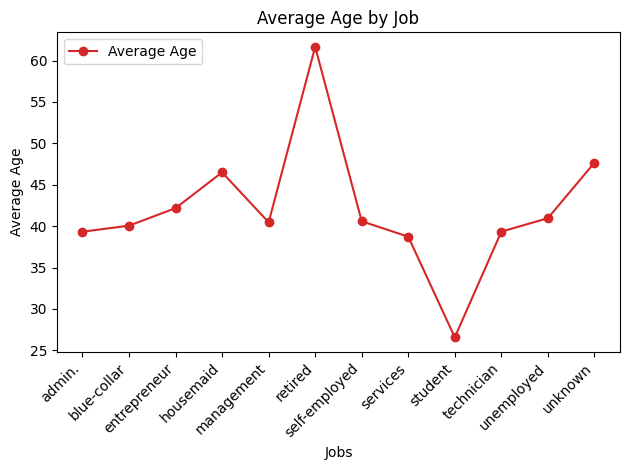

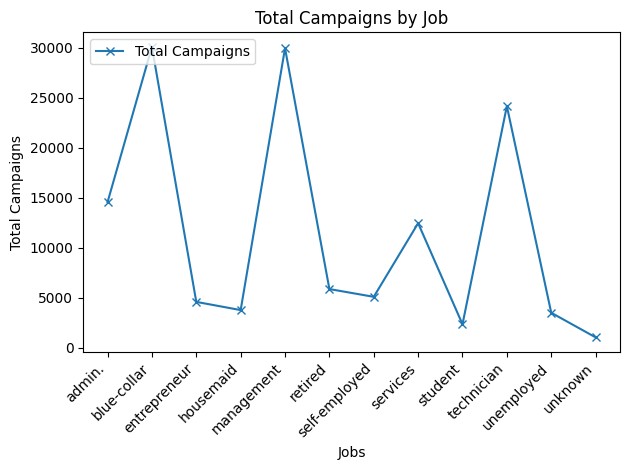

In [23]:

data = {
    'jobs': [i for i in data_1['job']],
    'age': [i for i in data_1['age']],
    'campaigns_count': [i for i in data_1['campaign']]
}

df = pd.DataFrame(data)
grouped_data = df.groupby('jobs').agg({'age': 'mean', 'campaigns_count': 'sum'}).reset_index()
plt.plot(grouped_data['jobs'], grouped_data['age'], color='tab:red', marker='o', label='Average Age')
plt.xlabel('Jobs')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.title('Average Age by Job')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(grouped_data['jobs'], grouped_data['campaigns_count'], color='tab:blue', marker='x', label='Total Campaigns')
plt.xlabel('Jobs')
plt.ylabel('Total Campaigns')
plt.xticks(rotation=45, ha='right')
plt.title('Total Campaigns by Job')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
data = {
    'education': [i for i in data_1['education']],
    'job': [i for i in data_1['job']],
    'subscribe': [1 if i == 'yes' else 0 for i in data_1['y']]
}

df = pd.DataFrame(data)

grouped_data = df.groupby('job').agg(total_subscriptions=('subscribe', 'sum')).reset_index()

fig = plx.bar(grouped_data, x='job', y='total_subscriptions',
             labels={'job': 'Job', 'total_subscriptions': 'Total Subscriptions'},
             title='Total Subscriptions by Job')

fig.update_layout(xaxis_title='Job', yaxis_title='Total Subscriptions')
fig.update_xaxes(tickangle=45)

fig.show()

In [39]:
data = {
    'education': [i for i in data_1['education']],
    'job': [i for i in data_1['job']],
    'subscribe': [1 if i == 'yes' else 0 for i in data_1['y']]
}

df = pd.DataFrame(data)

unique_education_levels = df['education'].unique()

for education_level in unique_education_levels:
    filtered_data = df[df['education'] == education_level]
    grouped_data = filtered_data.groupby('job').agg(total_subscriptions=('subscribe', 'sum')).reset_index()

    fig = plx.bar(grouped_data, x='job', y='total_subscriptions',
                 labels={'job': 'Job', 'total_subscriptions': 'Total Subscriptions'},
                 title=f'Total Subscriptions by Job for Education Level: {education_level}')

    fig.update_layout(xaxis_title='Job', yaxis_title='Total Subscriptions')
    fig.update_xaxes(tickangle=45)

    fig.show()